# Goal: eliminate bad light curves

I'm generating a light curve for each match specifically because I want to flag which ones 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.table
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u

from wuvars.data import spreadsheet, photometry
from wuvars.analysis.spectral_type_to_number import get_num_from_SpT
from wuvars.analysis.luhman16_coord_handler import coords_from_Luhman_table

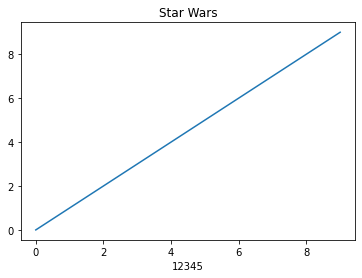

In [2]:
# testing something: pdf figure copy/paste

fig = plt.figure()
plt.plot(np.arange(10))
plt.title("Star Wars")
plt.xlabel("12345")

plt.savefig("test_figure.pdf")

# confirmed: yes, this works.

In [3]:
# now: a figure of a star which also lists these data quality attributes:
# Q = 0, 1(JHK), 2
# NJ / NJ_good / NJ_info / NJ_warn / NJ_severe (etc etc for H, K)
# median PSTAR


In [5]:
%run ../bd_matching_onc.py

In [10]:
dat = photometry.group_wserv_v2(photometry.load_wserv_v2(5))

Loading WSERV5 photometry data... DONE (elapsed time: 0.44s)


In [11]:
lowmass_match_sids = lowmass_joint_matches['SOURCEID']

In [ ]:
def q_string(sid, spread, q2, q1_tuple, q0):
    
    q1_j, q1_h, q1_k = q1_tuple
    
    if sid in spread[q2].index:
        return "2"

    elif sid in spread[q1_j | q1_h | q1_k].index:
        return_string = "1"

        if sid in spread[q1_j].index:
            return_string += "J"
        if sid in spread[q1_h].index:
            return_string += "H"            
        if sid in spread[q1_k].index:
            return_string += "K"            
            
    elif sid in spread[q0].index:
        return "0"
    
    else:
        return "-1"

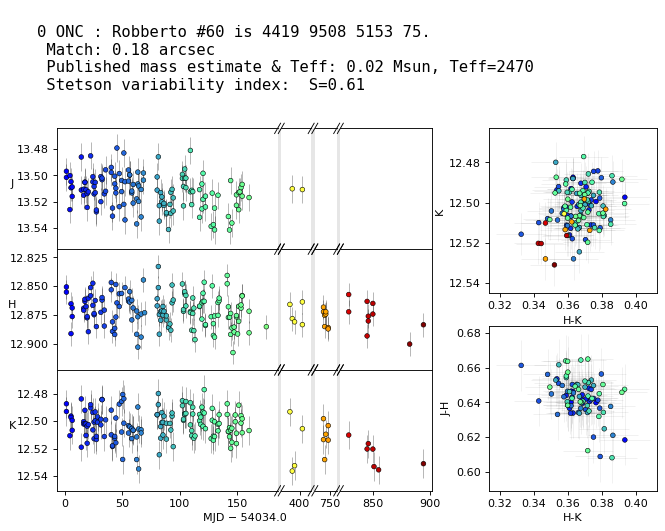

In [14]:
from wuvars.plotting.lightcurve import simple_lc, simple_lc_brokenaxes, onc_simple_lc_brokenaxes, onc_simple_lc_scatter_brokenaxes
from wuvars.analysis.sidsep import sidsep

lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"

for i, sid in enumerate(lowmass_match_sids):
    
    suptitle = ""
    
    suptitle += ("\n"+ f"{i} ONC : Robberto #{bd_matched['index'][i]} is {sidsep(sid)}.")
    suptitle += ("\n"+ f" Match: {d2d[sep_constraint][i].to(u.arcsec):.2f}")
    suptitle += ("\n"+ f" Published mass estimate & Teff: {bd_matched['Mstar'][i]} Msun, Teff={bd_matched['Teff'][i]}")

    #     print(f" Published mags: F160W={matched_bds['F160W'][i]:.1f}, F207M={matched_bds['F207M'][i]:.1f}")
#     print(f" Measured mags:  H={matches['HAPERMAG3'].values[i]:.1f}, K={matches['KAPERMAG3'].values[i]:.1f}")
    suptitle += ("\n"+ f" Stetson variability index:  S={spread['variability']['Stetson_JHK'].values[idx[sep_constraint & confident_bds][i]]:.2f}")
    suptitle += ("\n"+ " ")

    fig_lc = onc_simple_lc_scatter_brokenaxes(dat, sid,)
#     fig_lc.ax_j.set_title(f"{i} S-{table3['SONYC'][i]}. $S = {spread.wserv7['variability']['Stetson_JHK'].values[idx3[i]]:.2f}$")
    fig_lc.text(0.1, 0.925, suptitle, horizontalalignment='left', transform=fig_lc.transFigure, font='monospace', fontsize=14)

    data_quality_text = ""
    
    data_quality_text += 
    
    
    fig_lc.text(0.1, 0.925, data_quality_text, horizontalalignment='left', transform=fig_lc.transFigure, font='monospace', fontsize=14)
    
    
    fig_lc.savefig(os.path.join(lc_dir, f'ONC_{i:02d}_{sid}.pdf'), bbox_inches='tight')
    plt.show()
    
    break
    
    
    